In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../08-Time-Series-Analysis/monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['Month', 'Milk in Pounds per Cow']

df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df = df.dropna()

In [7]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df['Month'] = pd.to_datetime(df['Month'], format="%Y-%m") 
df.set_index('Month', inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [10]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


<AxesSubplot:xlabel='Month'>

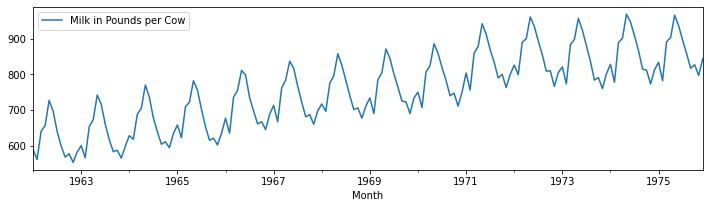

In [11]:
df.plot(figsize=(12, 3))

In [12]:
time_series = df['Milk in Pounds per Cow']

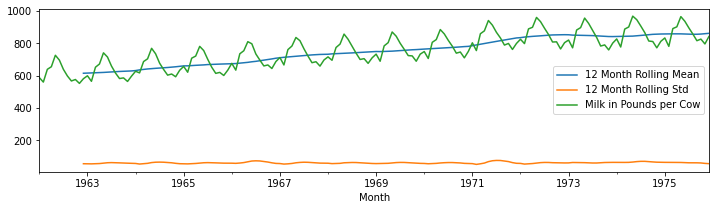

In [13]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot(figsize=(12, 3))
plt.legend()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(time_series)

<AxesSubplot:xlabel='Month'>

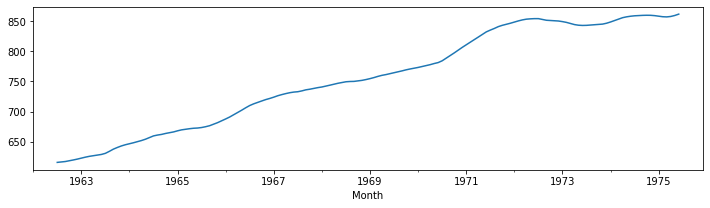

In [15]:
decomp.trend.plot(figsize=(12, 3))

<AxesSubplot:xlabel='Month'>

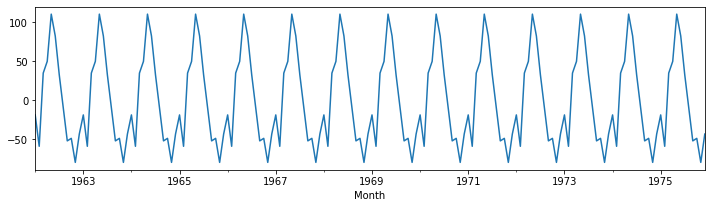

In [16]:
decomp.seasonal.plot(figsize=(12, 3))

<AxesSubplot:xlabel='Month'>

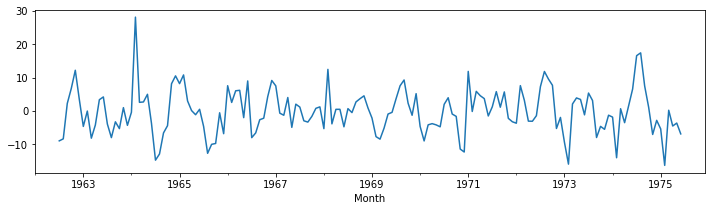

In [17]:
decomp.resid.plot(figsize=(12, 3))

In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Milk in Pounds per Cow'])

In [19]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    print('-'*50)
    labels = ['ADF Test Statistic', 'p-value', '# of lags used', '# of observations']
    
    for value, label in zip(result, labels):
        print(label + " : " + str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
        
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is not stationary")

In [20]:
adf_check(time_series)

Augmented Dicky-Fuller Test
--------------------------------------------------
ADF Test Statistic : -1.3038115874221248
p-value : 0.6274267086030337
# of lags used : 13
# of observations : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is not stationary


In [21]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1) 

<AxesSubplot:xlabel='Month'>

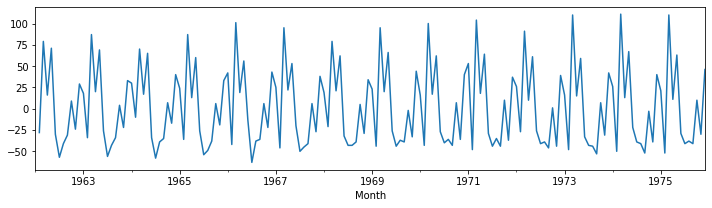

In [22]:
df['First Difference'].plot(figsize=(12, 3))

In [23]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
--------------------------------------------------
ADF Test Statistic : -3.05499555865311
p-value : 0.030068004001782334
# of lags used : 14
# of observations : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [24]:
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1) 

<AxesSubplot:xlabel='Month'>

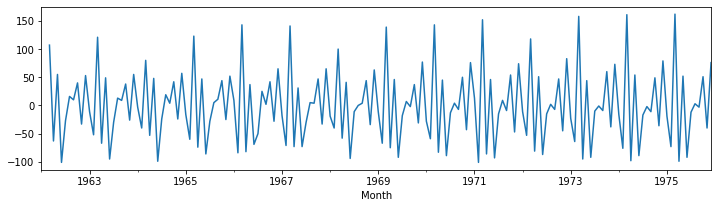

In [25]:
df['Second Difference'].plot(figsize=(12, 3))

In [26]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
--------------------------------------------------
ADF Test Statistic : -14.327873645603345
p-value : 1.1126989332082667e-26
# of lags used : 11
# of observations : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [27]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

<AxesSubplot:xlabel='Month'>

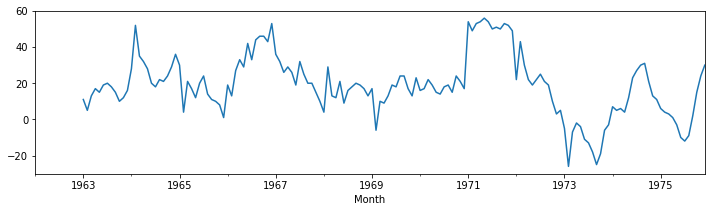

In [28]:
df['Seasonal Difference'].plot(figsize=(12, 3))

In [29]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
--------------------------------------------------
ADF Test Statistic : -2.335419314359397
p-value : 0.16079880527711382
# of lags used : 12
# of observations : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is not stationary


In [30]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

<AxesSubplot:xlabel='Month'>

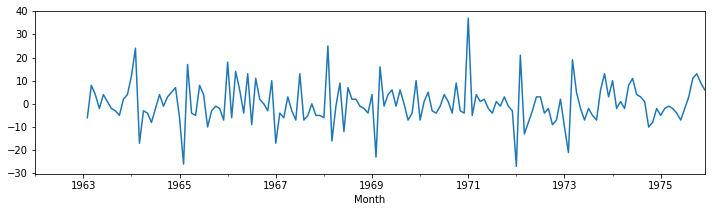

In [31]:
df['Seasonal First Difference'].plot(figsize=(12, 3))

In [32]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
--------------------------------------------------
ADF Test Statistic : -5.038002274921979
p-value : 1.865423431878876e-05
# of lags used : 11
# of observations : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

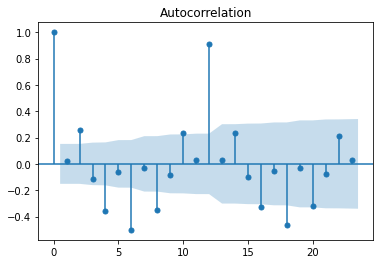

In [34]:
plot_acf(df['First Difference'].dropna());

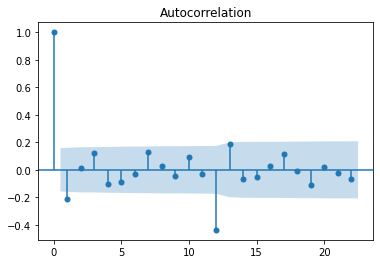

In [35]:
plot_acf(df['Seasonal First Difference'].dropna());

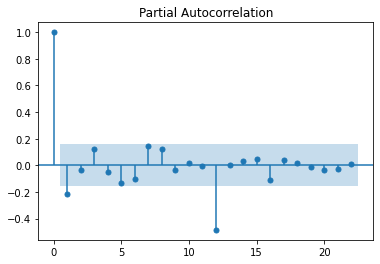

In [36]:
plot_pacf(df['Seasonal First Difference'].dropna());

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
model = SARIMAX(df['Milk in Pounds per Cow'], order=(0,1,0), seasonal_order=(1,1,1,12))

/Users/nathzi1505/virtual_environments/algo-trading-venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/nathzi1505/virtual_environments/algo-trading-venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [39]:
results = model.fit()

<AxesSubplot:xlabel='Month'>

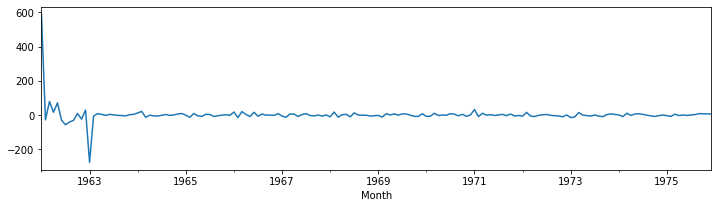

In [40]:
results.resid.plot(figsize=(12, 3))

<AxesSubplot:ylabel='Density'>

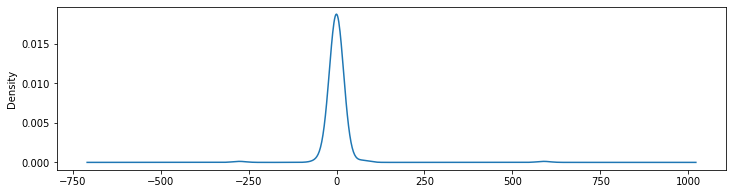

In [41]:
results.resid.plot(kind='kde', figsize=(12, 3))

<AxesSubplot:xlabel='Month'>

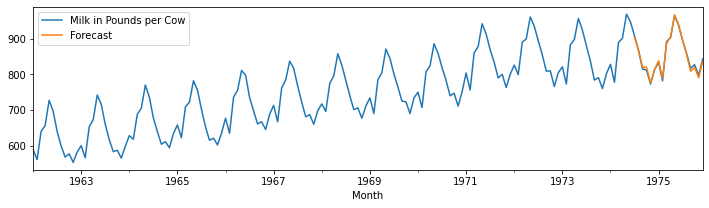

In [42]:
df['Forecast'] = results.predict(start=150, end=168)
df[['Milk in Pounds per Cow', 'Forecast']].plot(figsize=(12, 3))

In [43]:
df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,Forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [44]:
from pandas.tseries.offsets import DateOffset

In [47]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 24)]

In [51]:
future_df = pd.DataFrame(index=future_dates, columns=df.columns)

final_df = pd.concat([future_df, df])

<AxesSubplot:>

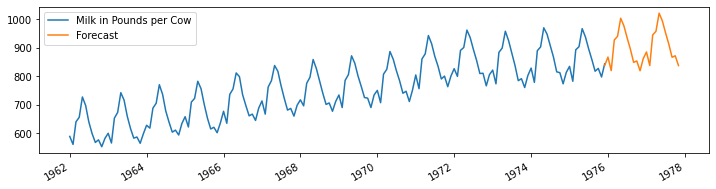

In [54]:
final_df['Forecast'] = results.predict(start=168-1, end=168+24)
final_df[['Milk in Pounds per Cow', 'Forecast']].plot(figsize=(12, 3))